# Linear Regression
### Main Steps
#### A) Use Least-Square method to fit line to data
#### B) Calculate R-Square 
#### C) calculate p-value for R-Square
### Steps : Least-Square method
#### 1) Draw Line through data-points
#### 2) Measure the distance from the line to data-points, Square each distance and sum all the distance
#### NOTE : The distance from the line to datapoints is called as "RESIDUAL"
#### 3) Rotate the line little bit and calculate RESIDUALS, square the and then add up the squares
#### 4) Keep rotating the line until you get sume of least sum of square residuals 
### Steps : R-Square method
#### 1) Calculate average of our Independent/Feature variable
#### 2) Now draw a line through average of feature
#### 3) now just like in least square, measure the distance from menn to data-points and square it and add to square
#### NOTE : This sum of square is called as SS(mean)
#### 4) Cost Function
#### a) y_hat : y = mx + c (The point that you predict in best fit line is called as y_hat)
#### b) y : Real points
#### $$Cost Function = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y} - y)^{2}$$

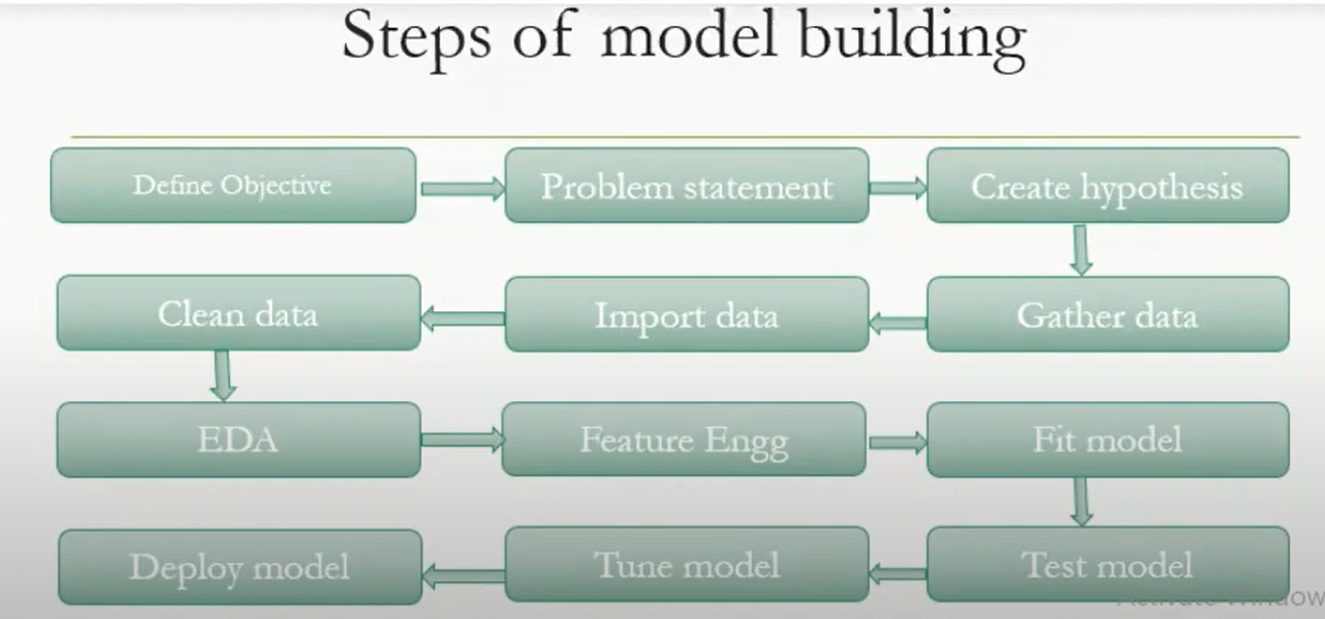

In [1]:
from IPython.display import Image
Image(filename='img1.png')

In [2]:
#https://www.kaggle.com/emredarende/eda-feature-eng-visualization-regression

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

## Business Goal
### We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables.They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [4]:
df = pd.read_csv('car.csv')

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Understanding Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
df.shape

(205, 26)

In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Distribution of price 

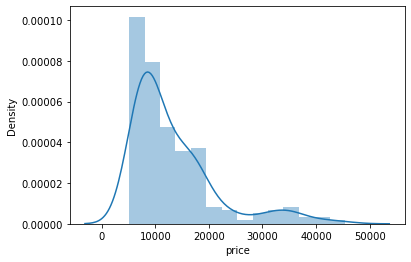

In [11]:
sns.distplot(df.price);

In [12]:
df.price.describe(percentiles=(1,0.9,0.99,0.75,0.5,0.3,0.1,0.01))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
1%        5201.120000
10%       6657.000000
30%       8022.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
99%      40802.720000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

## Plotting Categorical variabls

In [13]:
df.value_counts(df.CarName)

CarName
peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Length: 147, dtype: int64

In [14]:
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()

In [15]:
df.value_counts(df.brand)

brand
TOYOTA         31
NISSAN         18
MAZDA          15
MITSUBISHI     13
HONDA          13
SUBARU         12
PEUGEOT        11
VOLVO          11
VOLKSWAGEN      9
DODGE           9
BUICK           8
BMW             8
AUDI            7
PLYMOUTH        7
SAAB            6
PORSCHE         4
ISUZU           4
ALFA-ROMERO     3
JAGUAR          3
CHEVROLET       3
RENAULT         2
MAXDA           2
VW              2
PORCSHCE        1
MERCURY         1
TOYOUTA         1
VOKSWAGEN       1
dtype: int64

In [16]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI


### Some brand names have spelling mistake so replcaing those in our dataset

In [17]:
df['brand'] = df['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['brand'] = df['brand'].replace(['TOYOUTA'], 'TOYOTA')
df['brand'] = df['brand'].replace(['PORCSHCE'], 'PORSCHE')
df['brand'] = df['brand'].replace(['MAXDA'], 'MAZDA')

In [18]:
most_sell = df['brand'].value_counts(ascending=True)

### Car brand list accoriding to their car sell

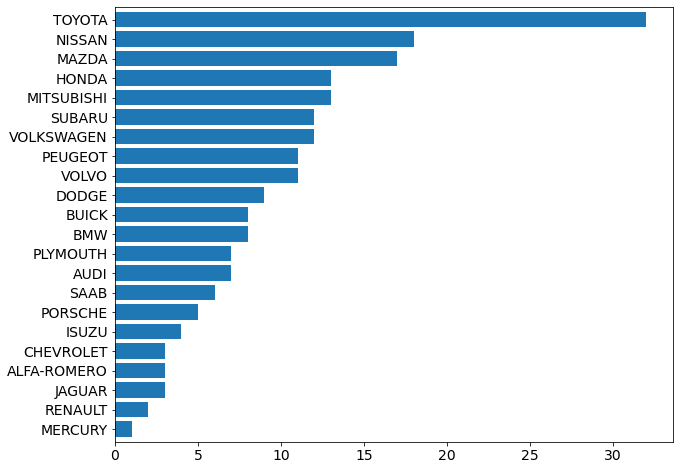

In [19]:
most_sell.plot(kind='barh',width=0.8,figsize=(10,8),fontsize=14);

In [20]:
most_sell.describe()

count    22.000000
mean      9.318182
std       6.937725
min       1.000000
25%       4.250000
50%       8.000000
75%      12.000000
max      32.000000
Name: brand, dtype: float64

In [21]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
brand                object
dtype: object

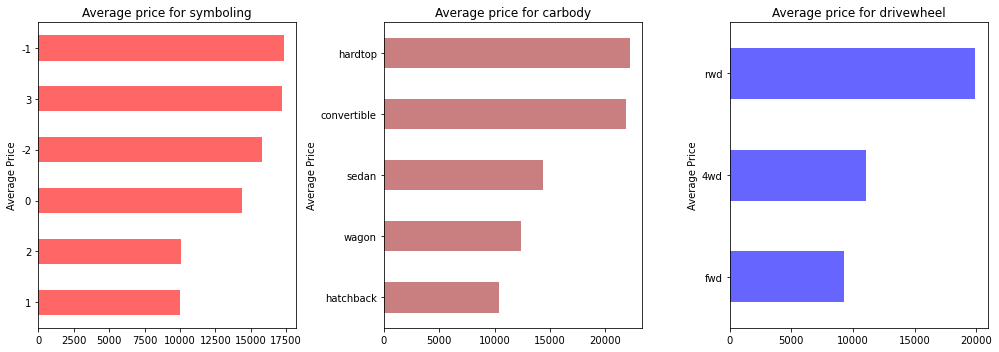

In [22]:
fig,axes=plt.subplots(nrows=1,ncols=3, figsize=(14,5))

fn = ['symboling','carbody','drivewheel']
color = ['red','brown','blue']

for idx, feature_name, c in zip(range(3), fn, color):
    ax = axes[idx]
    df.groupby(feature_name).price.mean().sort_values(ascending=True).plot(kind='barh',color=c,alpha=0.6,ax=ax)
    ax.set_title(f"Average price for {feature_name}")
    ax.set_ylabel("Average Price")
    ax.tick_params(axis = 'x')
plt.tight_layout()

## Observations:
### 1) HardTop and Convertable car type have higher sale ratio than sedan,wagon and hatchback
### 2) In case of drivewheel rear wheel drive have more sales than 4-wheel drive and front wheel drive

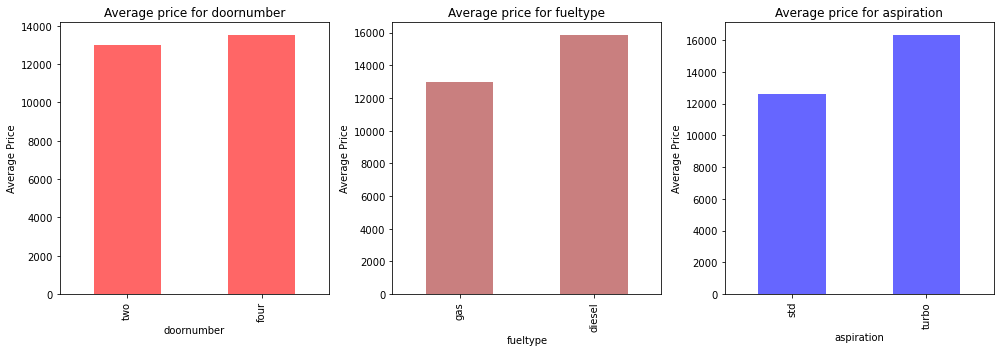

In [23]:
fig,axes=plt.subplots(nrows=1,ncols=3, figsize=(14,5))

fn = ['doornumber','fueltype','aspiration']
color = ['red','brown','blue']

for idx, feature_name, c in zip(range(3), fn, color):
    ax = axes[idx]
    df.groupby(feature_name).price.mean().sort_values(ascending=True).plot(kind='bar',color=c,alpha=0.6,ax=ax)
    ax.set_title(f"Average price for {feature_name}")
    ax.set_ylabel("Average Price")
    ax.ticklabel_format(axis = 'x')
plt.tight_layout()

## Obsercations:
### 1) Four doors cars have slightly more number of sales than two doors
### 2) People refers to diesel car than gas powered cars
### 3) Turbo aspiration is more as compared to std aspiration

## Effect of various feature on car price

### Average selling price of car for various brands 

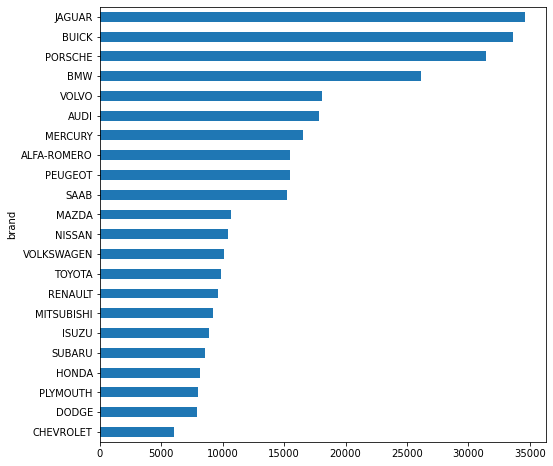

In [24]:
df.groupby(['brand']).price.mean().sort_values().plot(kind='barh',figsize=(8,8),fontsize=10);

In [25]:
fueltype = df.groupby(['fueltype']).price.mean().sort_values()
asp = df.groupby(['aspiration']).price.mean().sort_values()
door = df.groupby(['doornumber']).price.mean().sort_values()
carbody = df.groupby(['carbody']).price.mean().sort_values()
enginelocation = df.groupby(['enginelocation']).price.mean().sort_values()
drivewheel = df.groupby(['drivewheel']).price.mean().sort_values()
engineType = df.groupby(['enginetype']).price.mean().sort_values()

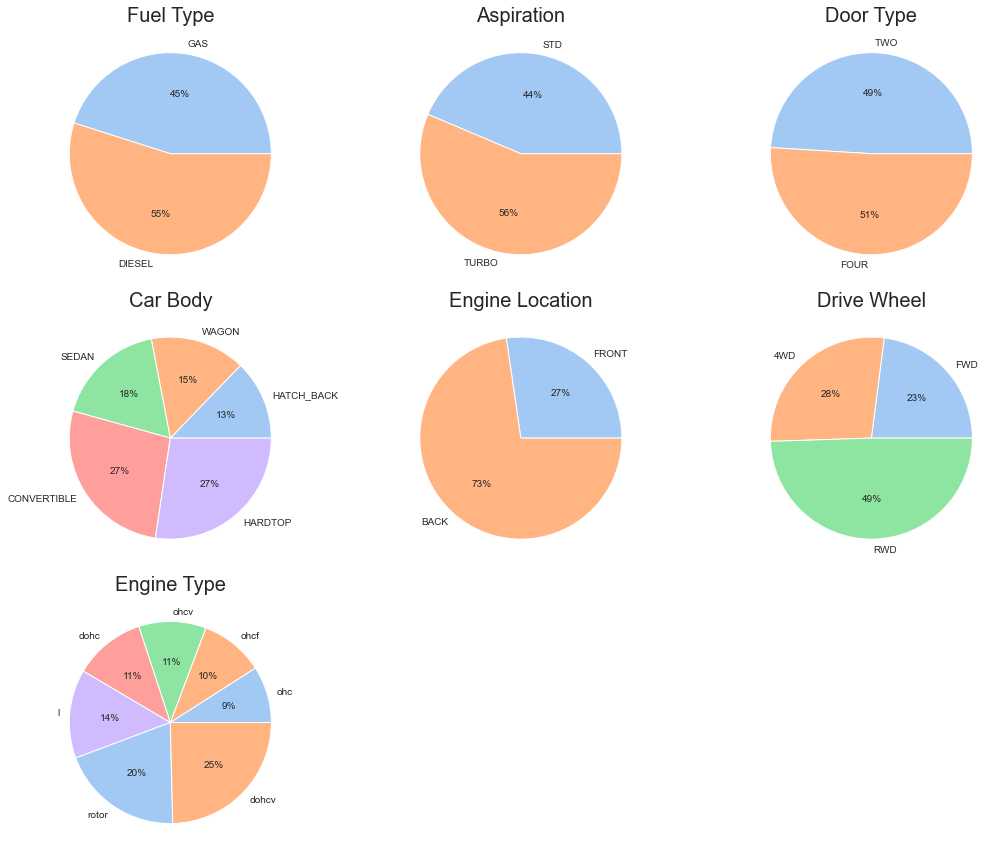

In [26]:
sns.set_style('whitegrid')
color = sns.color_palette('pastel')[0:5]
fig, axes = plt.subplots(3, 3,figsize=(15,12))

axes[0,0].pie(fueltype,colors = color,labels = ['GAS','DIESEL'],  autopct='%.0f%%')
axes[0,1].pie(asp,colors = color,labels = ['STD','TURBO'],  autopct='%.0f%%')
axes[0,2].pie(door,colors = color,labels = ['TWO','FOUR'],  autopct='%.0f%%')
axes[1,0].pie(carbody,colors = color,labels = ['HATCH_BACK','WAGON','SEDAN','CONVERTIBLE','HARDTOP'],  autopct='%.0f%%')
axes[1,1].pie(enginelocation,colors = color,labels = ['FRONT','BACK'],  autopct='%.0f%%')
axes[1,2].pie(drivewheel,colors = color,labels = ['FWD','4WD','RWD'],  autopct='%.0f%%')
axes[2,0].pie(engineType,colors = color,labels = ['ohc','ohcf','ohcv','dohc','l','rotor','dohcv'] , autopct='%.0f%%')

axes[0,0].set_title("Fuel Type", fontsize = 20,loc='center')
axes[0,1].set_title("Aspiration", fontsize = 20,loc='center')
axes[0,2].set_title("Door Type", fontsize = 20,loc='center')
axes[1,0].set_title("Car Body", fontsize = 20,loc='center')
axes[1,1].set_title("Engine Location", fontsize = 20,loc='center')
axes[1,2].set_title("Drive Wheel", fontsize = 20,loc='center')
axes[2,0].set_title("Engine Type", fontsize = 20,loc='center')
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.tight_layout()

## Highway and City fuel average
### As we konw cars tend to generate more average on highways/freeways rather than in city.
### So we can roughly calculate average of cars based upon 60%-40% partition 

In [27]:
df['total_average'] = df['citympg'] * 0.40 + df['highwaympg'] * 0.60

In [28]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'brand', 'total_average'],
      dtype='object')

## Plotting distribution of numeric variables

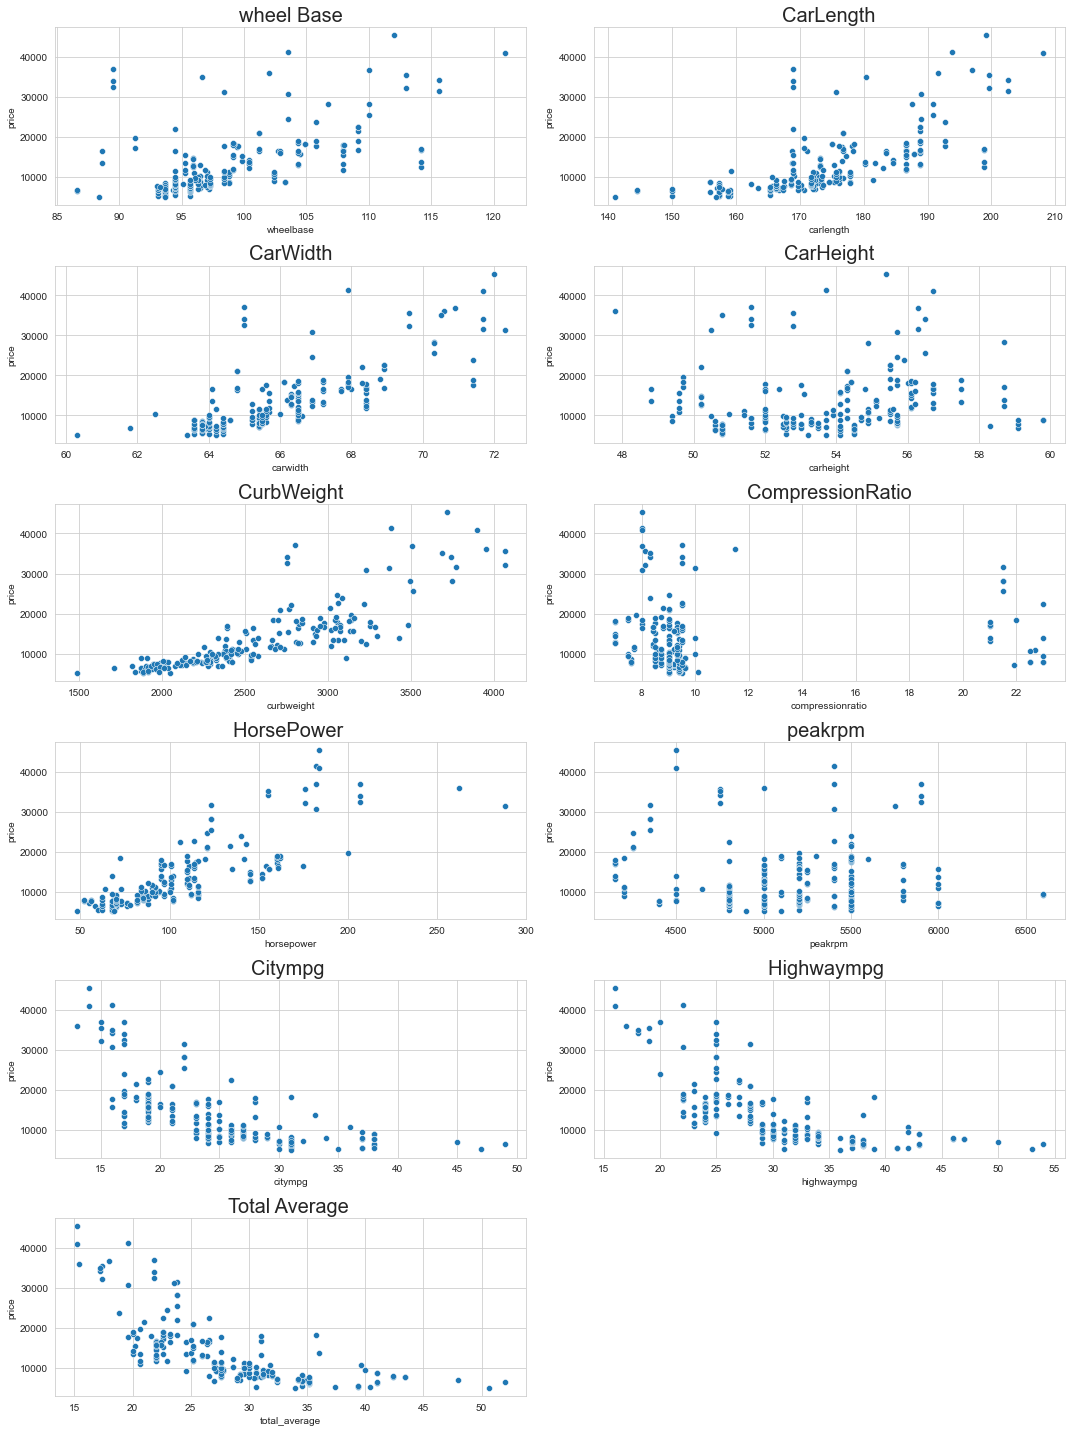

In [29]:
fig, axes = plt.subplots(6, 2,figsize=(15,20))
sns.scatterplot(x='wheelbase',y='price',data=df,ax=axes[0,0])
sns.scatterplot(x='carlength',y='price',data=df, ax=axes[0,1])
sns.scatterplot(x='carwidth',y='price',data=df, ax=axes[1,0])
sns.scatterplot(x='carheight',y='price',data=df, ax=axes[1,1])
sns.scatterplot(x='curbweight',y='price',data=df, ax=axes[2,0])
sns.scatterplot(x='compressionratio',y='price',data=df, ax=axes[2,1])
sns.scatterplot(x='horsepower',y='price',data=df, ax=axes[3,0])
sns.scatterplot(x='peakrpm',y='price',data=df, ax=axes[3,1])
sns.scatterplot(x='citympg',y='price',data=df, ax=axes[4,0])
sns.scatterplot(x='highwaympg',y='price',data=df, ax=axes[4,1])
sns.scatterplot(x='total_average',y='price',data=df, ax=axes[5,0])

axes[0,0].set_title("wheel Base", fontsize = 20,loc='center')
axes[0,1].set_title("CarLength", fontsize = 20,loc='center')
axes[1,0].set_title("CarWidth", fontsize = 20,loc='center')
axes[1,1].set_title("CarHeight", fontsize = 20,loc='center')
axes[2,0].set_title("CurbWeight", fontsize =20, loc='center')
axes[2,1].set_title("CompressionRatio", fontsize = 20,loc='center')
axes[3,0].set_title("HorsePower ", fontsize = 20,loc='center')
axes[3,1].set_title("peakrpm ", fontsize = 20,loc='center')
axes[4,0].set_title("Citympg ", fontsize = 20,loc='center')
axes[4,1].set_title("Highwaympg ", fontsize = 20,loc='center')
axes[5,0].set_title("Total Average ", fontsize = 20,loc='center')
fig.delaxes(axes[5,1])

plt.tight_layout();

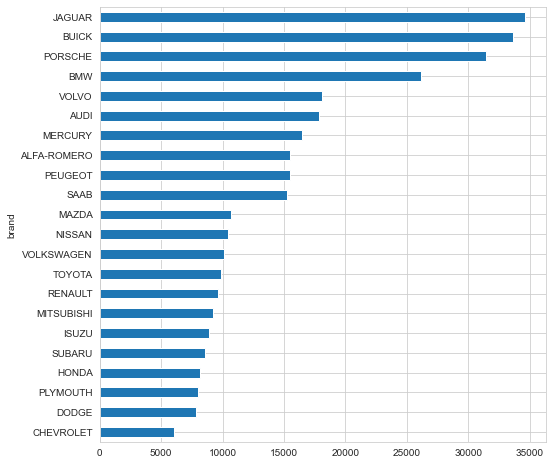

In [30]:
df.groupby(['brand']).price.mean().sort_values().plot(kind='barh',figsize=(8,8),fontsize=10);

### From above analysis we can divide the cars in three groups High-end,Medium and Low_end

In [31]:
high_end  = ['JAGUAR','BUICK','PORSCHE','BMW','VOLVO','AUDI','MERCURY']
medium  = ['ALFA-ROMERO','PEUGEOT','SAAB','MAZDA','NISSAN','VOLKSWAGEN','TOYOTA','RENAULT']
low_end  = ['MISTUBISHI','ISUZU','SUBARU','HONDA','PLYMOUTH','DODGE','CHEVROLET']

In [32]:
def brand(row):
    for (i,j,k) in zip(high_end,medium,low_end):
        if i == row['brand']:
            return 'high_end'
        elif j == row['brand']:
            return 'medium'
        elif k == row['brand']:
            return 'low_end'

In [33]:
df['category'] = df.apply(brand, axis=1)

In [34]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,total_average,category
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,24.6,medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,24.6,medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,23.2,medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,AUDI,27.6,high_end
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,AUDI,20.4,high_end


<AxesSubplot:xlabel='category', ylabel='count'>

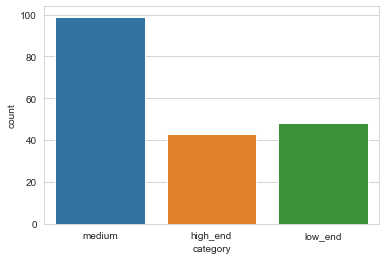

In [35]:
sns.countplot(x='category',data=df)

## defining X and y
### X = Independent variable
### y = Dependent Variable


### In this condition our X is all the numeric columns in our data
### y is Price column

In [36]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
brand                object
total_average       float64
category             object
dtype: object

In [37]:
X = df[['wheelbase','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','curbweight','carheight','carwidth','carlength']]

In [38]:
X.head()

,wheelbase,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,curbweight,carheight,carwidth,carlength
0,88.6,130,3.47,2.68,9.0,111,5000,21,27,2548,48.8,64.1,168.8
1,88.6,130,3.47,2.68,9.0,111,5000,21,27,2548,48.8,64.1,168.8
2,94.5,152,2.68,3.47,9.0,154,5000,19,26,2823,52.4,65.5,171.2
3,99.8,109,3.19,3.40,10.0,102,5500,24,30,2337,54.3,66.2,176.6
4,99.4,136,3.19,3.40,8.0,115,5500,18,22,2824,54.3,66.4,176.6


In [39]:
y = df['price']

In [40]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

## Splitting data

### note : train_test_split generates random samples every time automatically
###    random_state=10 parameter will naot generatr random samples

In [41]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X,y,test_size=0.3,random_state=40)

In [42]:
df.shape

(205, 29)

In [43]:
print(Xtrain1.shape,Xtest1.shape)

(143, 13) (62, 13)


In [44]:
print(ytrain1.shape,ytest1.shape)

(143,) (62,)


In [45]:
#https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe6

### Important features for model building

In [46]:
car_df = df[['price','fueltype','aspiration','carbody','drivewheel','wheelbase','curbweight','enginetype','cylindernumber','enginesize','boreratio','horsepower','total_average','carlength','carwidth','category']]

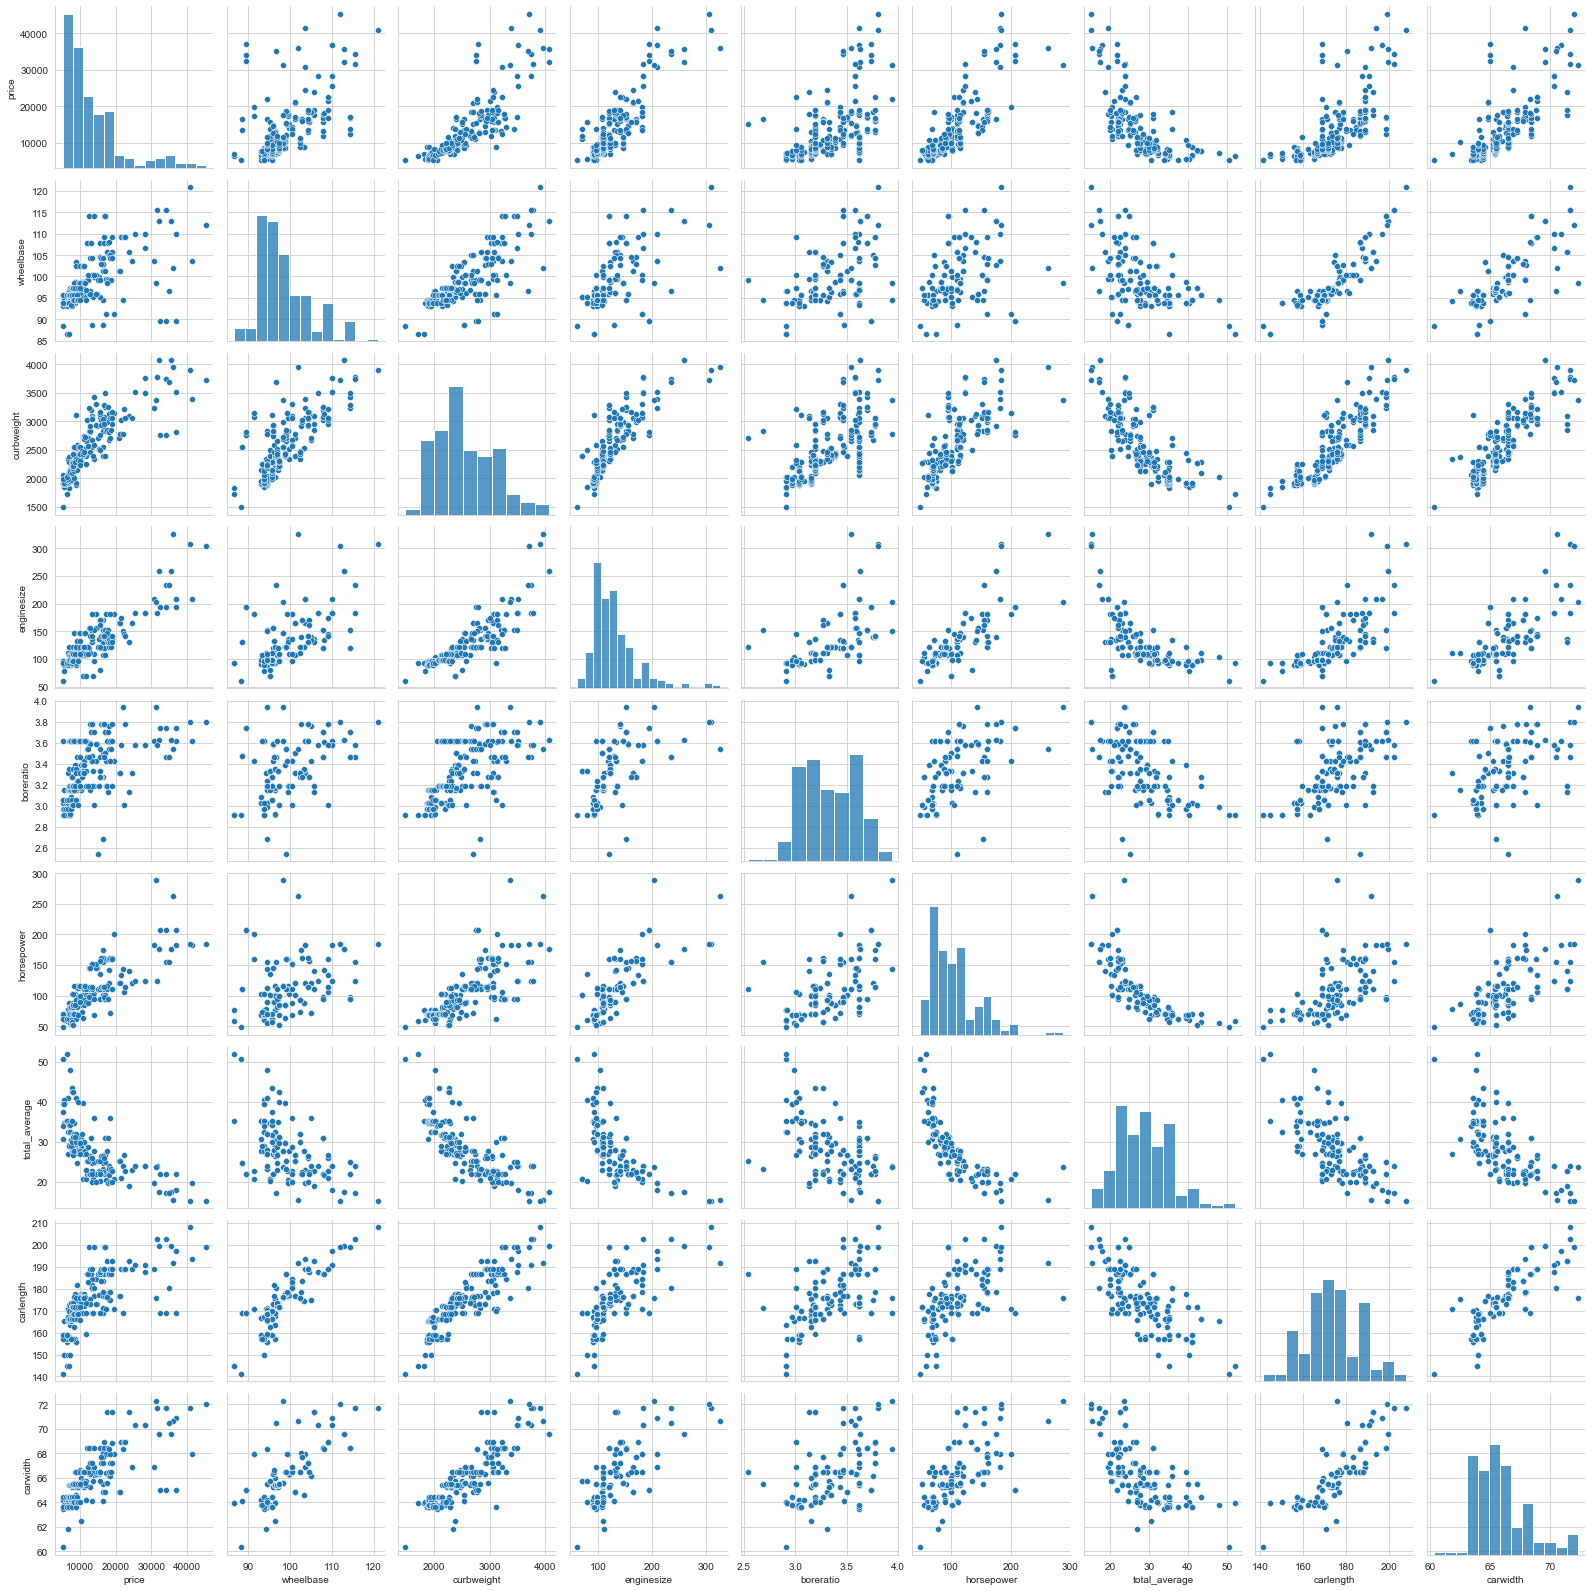

In [47]:
sns.pairplot(car_df)
plt.show()

## Dummy variables:
### 1) Categorical variables(can be used as independent variables OR as predictors)
#### a) NOMINAL : the variable dont have any realtion OR sequential order between them
#### b) Ordinal : the variable have relation between the such ahe increasing, decreasing order
### 2) Since the machine learning model doesnt understand the text data so we have to convert the text in our data tu numbers. In order to do that we will use DUMMY VARIABLES or ONE_HOT_ENCODING method

In [48]:
car_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,total_average,carlength,carwidth,category
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,24.6,168.8,64.1,medium
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,24.6,168.8,64.1,medium
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,23.2,171.2,65.5,medium
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,27.6,176.6,66.2,high_end
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,20.4,176.6,66.4,high_end


In [49]:
df_dummy = pd.get_dummies(car_df,columns=['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','category'])

In [50]:
df_dummy.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,total_average,carlength,carwidth,fueltype_diesel,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,category_high_end,category_low_end,category_medium
0,13495.0,88.6,2548,130,3.47,111,24.6,168.8,64.1,0,...,0,0,1,0,0,0,0,0,0,1
1,16500.0,88.6,2548,130,3.47,111,24.6,168.8,64.1,0,...,0,0,1,0,0,0,0,0,0,1
2,16500.0,94.5,2823,152,2.68,154,23.2,171.2,65.5,0,...,0,0,0,1,0,0,0,0,0,1
3,13950.0,99.8,2337,109,3.19,102,27.6,176.6,66.2,0,...,0,0,1,0,0,0,0,1,0,0
4,17450.0,99.4,2824,136,3.19,115,20.4,176.6,66.4,0,...,0,1,0,0,0,0,0,1,0,0


In [51]:
df_dummy.shape

(205, 38)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
y = df_dummy['price']
X = df_dummy.drop(['price'], axis=1)

In [54]:
print(X.shape)
print(y.shape)

(205, 37)
(205,)


In [55]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## FEATURE SCALING
### a) Normalization : helps us to scale down the features between 0-1
#### Min_Max scaler : $$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

### b) Standardization(Z-Score Normalization) : helps us to scale down the features based on standard normal distribution with 
###  mean = 0 and standart deviation = 1
#### $$Z = \frac{x - u}{\sigma }$$

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [58]:
lin_model = LinearRegression().fit(X_train,y_train)
lin_model

LinearRegression()

In [59]:
lin_model.score(X_train,y_train)

0.9500115404534399

### The coefficient is a factor that describes the relationship with an unknown variable.

In [60]:
lin_model.coef_

array([-7.27442459e+02,  2.44911158e+03,  2.23164468e+03, -9.97818814e+02,
        1.57545899e+03,  9.93081992e+01,  3.09182813e+02,  8.26672991e+02,
        1.04535218e+02, -1.04535218e+02, -2.71956973e+01,  2.71956973e+01,
        4.32300235e+02,  8.48107287e+02, -1.44806925e+02, -2.63367746e+01,
       -4.74580149e+02, -8.43500411e+01,  2.21355096e+02, -1.90001904e+02,
        2.49104286e+01, -5.65853055e+02,  4.05142774e+02, -3.15728398e+01,
        4.62389001e+02, -9.09930686e+02,  3.90089808e+02,  9.81607455e+02,
       -4.29222599e+02, -2.60502303e+02,  4.03121421e+01, -6.36078683e-31,
       -1.85701182e+02,  3.90089808e+02,  3.08079826e+03,  6.19612989e+02,
        7.84709036e+02])

In [61]:
lin_model.intercept_

13222.384663985618

In [62]:
lin_model.score(X_test , y_test)

0.8580514566135266

In [63]:
pred = lin_model.predict(X_test)

In [64]:
pred

array([27666.70635872, 22012.57640897, 10168.82692398, 11906.80704948,
       24568.00647058,  6575.86483924,  8415.88332924,  7361.98330582,
        9461.53944238,  9056.52744732, 12780.42616865,  6625.51019785,
       10811.79615396, 10335.88341968, 38295.87430449,  5948.69767325,
        3465.70762236, 14359.50201745,  8889.71709967, 10269.76008789,
       10439.93837616, 16255.69464949, 11013.4023812 ,  5888.04276854,
        6683.48095011, 28880.87367855, 15972.44628728, 17744.48635751,
        5588.93652853, 18566.75094015, 24857.45439301,  6327.15586807,
        5438.54346931, 19382.51243474,  7382.65071125, 29509.65768918,
       11016.30203854, 13405.71723499,  6041.38887522, 14761.08352757,
        8231.01116821, 10815.46685655, 14345.18255458,  6320.72891274,
        6552.15312176,  9363.67204353,  6327.15586807,  7506.49253044,
       16992.21122471, 15645.10596611,  5623.7663013 , 19093.93960253,
        8026.77865155, 10203.242507  ,  5527.63903665, 17827.91617417,
      

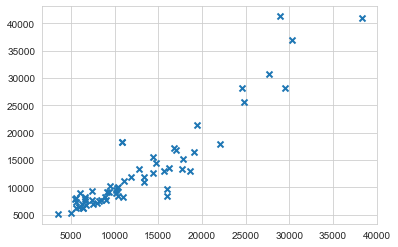

In [65]:
plt.scatter(x=pred,y=y_test,linewidths=2,marker='x');

In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test , pred)
r2

0.8580514566135266

## Lasso Regression

In [67]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train , y_train)

Lasso(alpha=0.1)

In [68]:
model.score(X_train,y_train)

0.9500115072872989

In [69]:
model.score(X_test,y_test)

0.8577558492579348

In [70]:
model.coef_

array([-7.24804789e+02,  2.44815425e+03,  2.22991853e+03, -9.96770212e+02,
        1.57467631e+03,  9.72567418e+01,  3.07277615e+02,  8.26328336e+02,
        2.09616628e+02, -5.36927713e-11, -5.40425707e+01,  7.73414281e-12,
        4.82806863e+02,  9.06564871e+02, -2.94332866e+00,  1.23075272e+02,
       -3.76747952e+02, -3.92712681e+00,  4.14515698e+02, -0.00000000e+00,
        3.49775708e+01, -5.62282000e+02,  4.14150059e+02, -1.25968638e+01,
        4.73109383e+02, -8.98703510e+02,  8.20950610e+02,  1.02856984e+03,
       -3.59807905e+02, -1.33134548e+02,  1.38896404e+02, -0.00000000e+00,
       -1.63778557e+02,  6.55990496e+00,  3.07882046e+03,  6.18167928e+02,
        7.83145665e+02])

In [71]:
model.intercept_

13220.935003275441

In [72]:
lpred = model.predict(X_test)

In [73]:
lpred

array([27664.43627298, 22011.56454125, 10167.99390618, 11905.99277679,
       24569.48506681,  6575.29068017,  8414.50009232,  7362.80197589,
        9460.84363029,  9055.03979044, 12783.1009884 ,  6626.29133894,
       10817.22538717, 10336.62093466, 38295.6999381 ,  5949.54919942,
        3154.30370768, 14360.2765229 ,  8892.33693069, 10269.7449638 ,
       10439.61693838, 16258.54908175, 11016.32787594,  5881.68716606,
        6683.3194304 , 28877.42301078, 15975.72485775, 17743.96309634,
        5587.44120396, 18566.90806004, 24859.82164183,  6326.77185415,
        5439.05080929, 19388.39016426,  7385.69439396, 29513.58004243,
       11015.90174888, 13405.32716556,  6040.38866654, 14761.72543462,
        8230.30529014, 10818.92068585, 14345.73128278,  6319.38078086,
        6551.99350387,  9363.04128566,  6326.77185415,  7508.15640307,
       16990.20790928, 15642.58616651,  5622.56755885, 19094.37125597,
        8023.67115726, 10203.791626  ,  5526.16767252, 17829.2435675 ,
      

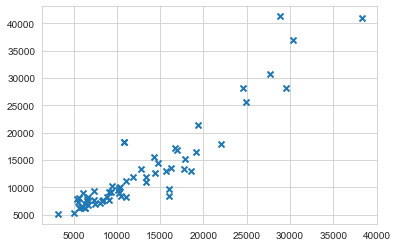

In [74]:
plt.scatter(x=lpred,y=y_test,linewidths=2,marker='x');

In [75]:
r = r2_score(y_test , lpred)
r

0.8577558492579348

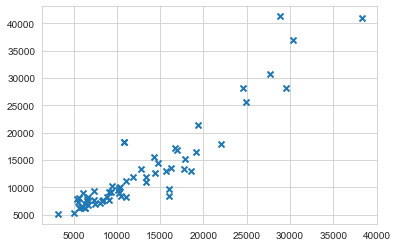

In [76]:
plt.scatter(x=lpred,y=y_test,linewidths=2,marker='x');